In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from torchvision import transforms

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [5]:
model = YOLO('models/yolo11n.pt')
model = model.cpu()

In [30]:
img = cv2.imread('data/images/000022704.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
print("rgb_img shape:", rgb_img.shape)
img = np.float32(img) / 255

rgb_img shape: (640, 640, 3)


In [31]:
target_layers =[model.model.model[-6]]
print(target_layers)

[Concat()]


<class 'numpy.ndarray'>

0: 640x640 13 persons, 1 tennis racket, 201.0ms
Speed: 3.8ms preprocess, 201.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


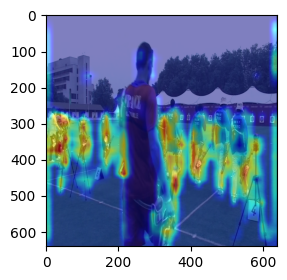

In [32]:
cam = EigenCAM(model, target_layers, task='od')
print(type(rgb_img))
grayscale_cam = cam(rgb_img)[0,:,:]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

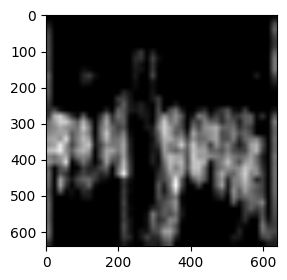

In [33]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

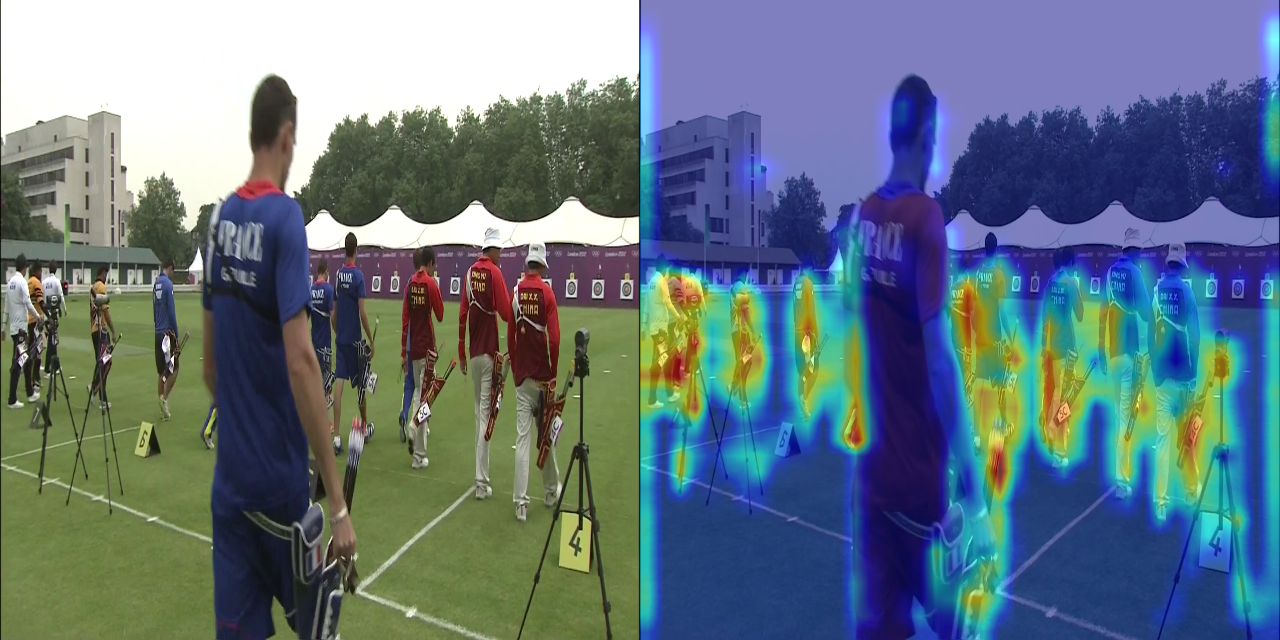

In [34]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))